In [29]:
import os
import requests

import numpy as np
# Import the matplotlib libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as im

from PIL import Image

In [44]:
inslated_jackets = os.listdir("/gearimages/gear_images/insulated_jackets")
hardshell_jackets = os.listdir("/gearimages/gear_images/hardshell_jackets")
filepath = "/gearimages/gear_images/"

In [52]:
os.listdir("gear_images/insulated_jackets/")

['10254531x1110654_zm.jpeg',
 '10223783x1150950_zm.jpeg',
 '10281638x1037423_zm.jpeg',
 '10342603x1011296_zm.jpeg',
 '10344853x1150902_zm.jpeg',
 '118504.jpeg',
 '2034956_001_main.jpg',
 '10316923x1048305_zm.jpeg',
 '2041236_001_main.jpg',
 '10312822x1141048_zm.jpeg',
 '10342601x1012360_zm.jpeg',
 '10223782x1042852_zm.jpeg',
 '10344852x1063775_zm.jpeg',
 '10221581x1151234_zm.jpeg',
 '10221581x1107976_zm.jpeg',
 '10316924x1150791_zm.jpeg',
 '10316924x1050984_zm.jpeg',
 '103454.jpeg',
 '10167913x1116023_zm.jpeg',
 '10167913x1152157_zm.jpeg',
 '10282885x1128657_zm.jpeg',
 '10342602x1044830_zm.jpeg',
 '10344610x1150780_zm.jpeg',
 '10254528x1063556_zm.jpeg',
 '10317107x1071952_zm.jpeg',
 '10281293x1140556_zm.jpeg',
 '10281835x1140853_zm.jpeg',
 '10344852x1150780_zm.jpeg',
 '2041239_001_main.jpg',
 '10281836x1012905_zm.jpeg',
 '10344853x1050984_zm.jpeg',
 '10312818x1149711_zm.jpeg',
 '117956.jpeg',
 '10167913x1063714_zm.jpeg',
 '10281638x1011016_zm.jpeg',
 '10312819x1149856_zm.jpeg',
 '10312

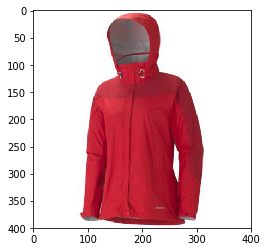

In [34]:
# Display matplotlib plots inline in the notebook
%matplotlib inline


# ADD CODE: load jacket_images/hardshell_jackets/10116634x1038116_zm.jpeg into a variable named img and display it
img = np.array(Image.open(filepath+'hardshell_jackets/10116634x1038116_zm.jpeg'))
imshow(img)

In [35]:
training_key = "afe0e9174ca94789ad0960763b895496"
prediction_key = "784c5fa718db4116989d4bab1c614db4"
project_id = "b1f2a115-a259-4707-aaeb-fa4b48b4c673"

In [38]:
# ADD CODE: Create a new project named "Ready OpenHack PreAssessment"
from azure.cognitiveservices.vision.customvision.training import training_api
from azure.cognitiveservices.vision.customvision.training.models import ImageUrlCreateEntry

trainer = training_api.TrainingApi(training_key)

In [39]:
project = trainer.get_project(project_id)

In [40]:
# ADD CODE: Add tags for hardshell jackets and insulated jackets to the project
# Make two tags in the new project
insulatedjacket_tag = trainer.create_tag(project.id, "Insultated Jacket")
hardshelljacket_tag = trainer.create_tag(project.id, "Hardshell Jacket")

In [45]:
# ADD CODE: Upload the images in hardshell_jackets and insulated_jackets folders, assigning appropriate tags
hardshell_imgs = os.listdir(os.fsencode(filepath+'/hardshell_jackets/'))
insulated_imgs = os.listdir(os.fsencode(filepath+'/insulated_jackets/'))

hardshellDir = filepath+'//hardshell_jackets'
for img in hardshell_imgs:
    with open(hardshellDir + "//" + os.fsdecode(img), mode="rb") as img_data: 
        trainer.create_images_from_data(project.id, img_data, [ hardshelljacket_tag.id ])

In [46]:
insulatedDir = filepath+'//insulated_jackets'
for img in insulated_imgs:
    with open(insulatedDir + "//" + os.fsdecode(img), mode="rb") as img_data: 
        trainer.create_images_from_data(project.id, img_data, [ insulatedjacket_tag.id ])

In [47]:
# ADD CODE: Train the project
import time

print ("Training...")
iteration = trainer.train_project(project.id)
while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)

# The iteration is now trained. Make it the default project endpoint
trainer.update_iteration(project.id, iteration.id, is_default=True)
print ("Done!")

Training...
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Completed
Done!


In [48]:
def read_image_data(img_path):
    import numpy as np
    from io import BytesIO
    import matplotlib.pyplot as plt
    
    # Load the numpy array
    imgArray = np.load(img_path)
    # Write the array data to a stream
    imageStream = BytesIO()
    plt.imsave(imageStream, imgArray)
    # Read the stream from the beginning
    imageStream.seek(0)
    return imageStream.read()

print ('read_image_data function created!')

read_image_data function created!


In [65]:
def read_image_data(img_path):
    import numpy as np
    from io import BytesIO
    import matplotlib.pyplot as plt
    
    # Load the numpy array
    #imgArray = np.load(img_path)
    with open(img_path, "rb") as image:
        # Write the array data to a stream
        imageStream = BytesIO()
        plt.imsave(imageStream, imgArray)
        # Read the stream from the beginning
        imageStream.seek(0)
    return imageStream.read()

['.ipynb_checkpoints',
 'azureml',
 'gear_images.zip',
 'Introduction to Azure ML R notebooks.ipynb',
 'Chainer',
 'Challenge 1.ipynb',
 'deep_water',
 'IntroTutorialinMicrosoftR.ipynb',
 'SQLDW_Explorations.ipynb',
 'Challenge 1 Tony.ipynb',
 'pytorch',
 'Introduction to Microsoft R Operationalization.ipynb',
 'IDEAR.ipynb',
 'mxnet',
 'gear_images',
 'CNTK',
 'BatchAI',
 'IrisClassifierPyMLWebService.ipynb',
 'LoadDataIntoDW.ipynb',
 'MMLSpark',
 'DocumentDBSample.ipynb',
 'tensorflow',
 'test_images',
 'caffe2',
 'IntroToJupyterPython.ipynb',
 'SparkML',
 'julia',
 'Tanner.ipynb',
 'IntroTutorialinR.ipynb',
 'h2o']

In [78]:
import os
import time
# ADD CODE: Import the prediction endpoint
from azure.cognitiveservices.vision.customvision.prediction import prediction_endpoint
from azure.cognitiveservices.vision.customvision.prediction.prediction_endpoint import models
# ADD CODE: Create an instance of the prediction endpoint using your prediction key
predictor = prediction_endpoint.PredictionEndpoint(prediction_key)

# Loop through the test images
folder = "test_images"
files = os.listdir(folder)[1:]
for file in sorted(files):
    # process files in order
    print(file)
    
    # Get the file path and read the image data
    img_path = os.path.join(folder,file)
    #img_data = read_image_data(img_path)
    with open(img_path, mode="rb") as test_data:
        results = predictor.predict_image(project.id, test_data, iteration.id)
    
    # ADD CODE: Get the predicted tags for the image
    #results = predictor.predict_image(project.id, img_data, iteration.id)

    
    # ADD CODE: Display the tag name and probability for each prediction
    for prediction in results.predictions:
        print ("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100))
    
            
    print('\n')
    # Delay to avoid rate-limit error in free service
    time.sleep(0.25)


10116634x1038116_zm.jpeg
	Hardshell Jacket: 98.89%
	Insultated Jacket: 0.66%


10116634x1068361_zm.jpeg
	Hardshell Jacket: 98.98%
	Insultated Jacket: 0.64%


10116634x1072858_zm.jpeg
	Hardshell Jacket: 99.67%
	Insultated Jacket: 0.38%


101634.jpeg
	Hardshell Jacket: 99.89%
	Insultated Jacket: 0.85%


10167913x1063714_zm.jpeg
	Insultated Jacket: 99.71%
	Hardshell Jacket: 1.13%


10167913x1116023_zm.jpeg
	Insultated Jacket: 99.87%
	Hardshell Jacket: 1.33%


10167913x1116127_zm.jpeg
	Insultated Jacket: 99.87%
	Hardshell Jacket: 0.22%


10167913x1131896_zm.jpeg
	Insultated Jacket: 99.97%
	Hardshell Jacket: 0.04%


10167913x1152157_zm.jpeg
	Insultated Jacket: 100.00%
	Hardshell Jacket: 0.01%


10184183x1012360_zm.jpeg
	Hardshell Jacket: 99.92%
	Insultated Jacket: 0.55%


10184183x1012905_zm.jpeg
	Hardshell Jacket: 97.52%
	Insultated Jacket: 6.62%


10184183x1068533_zm.jpeg
	Hardshell Jacket: 99.93%
	Insultated Jacket: 0.52%


10184183x1140536_zm.jpeg
	Hardshell Jacket: 99.99%
	Insultated J